# TASK 1: SETTING THE FOLDER

In [1]:
import pandas as pd
# Load the CSV file
df = pd.read_csv('/Users/ramati/Desktop/שנה ב/סמסטר ב/מבוא למדעי הנתונים/תרגיל בית 2/Customer_Shopping_Habits (2).csv')
df

,Age,Family_Size,Annual_Income,Spending_Score,Eating_Out,Shopping_Frequency,Online_Spending,Entertainment,Travel_Spending,Education_Level
0,0.716171,0.702969,0.980210,-1.378178,-0.010830,-0.770301,1.498708,-0.567163,-1.000156,-0.659079
1,-0.955647,-1.374773,0.005352,0.201334,0.745899,-0.386111,0.260257,0.047063,0.753480,0.023904
2,1.619856,-1.374773,-1.810560,0.427192,-0.462102,1.534839,0.138840,-1.156998,1.228891,0.023904
3,1.122829,-0.682192,-0.510749,0.261334,-0.997529,1.534839,-0.662511,0.726608,0.703024,-0.659079
4,-0.684542,-0.682192,-1.753215,-0.841988,-0.306582,-1.154491,0.090273,-1.185180,0.788800,1.389872
...,...,...,...,...,...,...,...,...,...,...
195,-0.142330,1.395550,-1.676756,-0.444691,0.412593,0.382269,-0.953911,-1.485698,0.582490,0.023904
196,0.173959,0.702969,0.502339,-1.893941,0.200470,-0.001921,0.709499,0.077066,-0.082412,-0.659079
197,0.128775,-0.682192,-0.071107,-1.446948,0.233639,0.766459,-1.560995,1.215143,-0.218644,0.706888
198,-1.588227,0.702969,1.305163,1.640325,-0.418794,-1.154491,-0.941769,0.411733,-0.746192,0.023904


# TASK 2: IMPORT LIBRARIES & MODULES

In [2]:
# Import necessary libraries and modules
import scipy
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TASK 3: EXPLORE THE DATA

In [3]:
# Display the first few rows of the dataset
print("first few rows of the dataset:\n\n", df.head(), "\n")

# Display the number of rows and columns
print("Number of rows (cases):", df.shape[0], "\n")
print("Number of columns (dimensions):", df.shape[1], "\n")

# Display column names to understand the dimensions
print("Column names:", df.columns.tolist())

first few rows of the dataset:

         Age  Family_Size  Annual_Income  Spending_Score  Eating_Out  \
0  0.716171     0.702969       0.980210       -1.378178   -0.010830   
1 -0.955647    -1.374773       0.005352        0.201334    0.745899   
2  1.619856    -1.374773      -1.810560        0.427192   -0.462102   
3  1.122829    -0.682192      -0.510749        0.261334   -0.997529   
4 -0.684542    -0.682192      -1.753215       -0.841988   -0.306582   

   Shopping_Frequency  Online_Spending  Entertainment  Travel_Spending  \
0           -0.770301         1.498708      -0.567163        -1.000156   
1           -0.386111         0.260257       0.047063         0.753480   
2            1.534839         0.138840      -1.156998         1.228891   
3            1.534839        -0.662511       0.726608         0.703024   
4           -1.154491         0.090273      -1.185180         0.788800   

   Education_Level  
0        -0.659079  
1         0.023904  
2         0.023904  
3        -0

In [4]:
# Check unique values and their frequency in a specific column
print("*Educ_Level  *count\n", df['Education_Level'].value_counts(),"\n")

# Describe the dataset to see statistical summaries of numerical columns
print(df.describe())

*Educ_Level  *count
 -1.342063    44
-0.659079    43
 1.389872    43
 0.706888    38
 0.023904    32
Name: Education_Level, dtype: int64 

                Age   Family_Size  Annual_Income  Spending_Score  Eating_Out  \
count  2.000000e+02  2.000000e+02   2.000000e+02      200.000000  200.000000   
mean   6.328271e-17 -7.771561e-18   2.949030e-17       -0.008175    0.017217   
std    1.002509e+00  1.002509e+00   1.002509e+00        1.025767    1.052444   
min   -1.588227e+00 -1.374773e+00  -1.810560e+00       -2.139581   -2.044887   
25%   -9.556473e-01 -6.821920e-01  -8.500380e-01       -0.844212   -0.904477   
50%    1.581450e-02  1.038871e-02   1.009265e-01        0.044895    0.139971   
75%    9.082039e-01  7.029694e-01   9.085295e-01        0.789145    0.840972   
max    1.619856e+00  1.395550e+00   1.496312e+00        1.972701    2.127720   

       Shopping_Frequency  Online_Spending  Entertainment  Travel_Spending  \
count        2.000000e+02     2.000000e+02     200.000000     

### Data Point Representation in the Dataset

In the dataset, the data points, including `Education_Level`, are represented as **normalized numerical values using z-score normalization**. This method of representation indicates how many standard deviations a value is from the mean of that feature:

- **Value of '0'**: Indicates an education level that is exactly at the average for the dataset.
- **Value of '1'**: Represents an education level that is one standard deviation above the average.
- **Negative values**: Signify education levels below the average.

This normalization approach allows for effective comparison across different features and facilitates various analytical and machine learning techniques.


# TASK 4: BUILDING THE K-Means Algorithm

#### Prepare The Data - checking for NA's values and removing them

In [5]:
na_counts = df.isna().sum()
print("Count of missing values in each column:\n", na_counts)
df.dropna(inplace=True)

Count of missing values in each column:
 Age                   0
Family_Size           0
Annual_Income         0
Spending_Score        0
Eating_Out            0
Shopping_Frequency    0
Online_Spending       0
Entertainment         0
Travel_Spending       0
Education_Level       0
dtype: int64


### K - means function

In [9]:
def get_clusterer(cluster_num, df):
    clusterer = KMeans(n_clusters=cluster_num)
    preds = clusterer.fit_predict(df)
    return clusterer, preds

### Compare Silhouette of Different Models

### Get Models' Silhouettes

In [18]:
# Define a function that will calculate the silouhettes of different models
k_range = np.arange(2, 31, 1)
distance_metric = 'euclidean'
def get_silhouettes (df):
    Silhouettes = []
    for k in k_range:
        clusterer, preds = get_clusterer (k, df)
        Silhouettes.append(silhouette_score(df, preds, metric = distance_metric))
    return Silhouettes

# Call the function
Silhouettes = get_silhouettes (df)
Silhouettes

[0.09147032629708052,
 0.08044248737390744,
 0.08051202872360247,
 0.08629285650397861,
 0.08932903134788436,
 0.08530024034033902,
 0.09288364555271747,
 0.08915424610109918,
 0.09026332021069841,
 0.08727647347324752,
 0.09834799313690677,
 0.09967406827134433,
 0.10226604260834293,
 0.08989096601588774,
 0.09804975061044814,
 0.08707134768070922,
 0.09501628191664074,
 0.09833875876716142,
 0.09586409158340978,
 0.10025610309232266,
 0.09986644151857119,
 0.09907502159829054,
 0.10145870149392365,
 0.09977824874601193,
 0.09746085343650378,
 0.09950186075128631,
 0.10052080627427092,
 0.10645509441463176,
 0.10086154309475752]

### Determine the Optimal Number of Clusters  

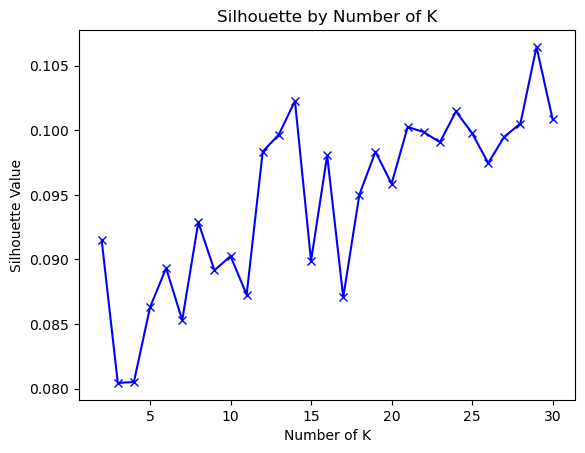

In [19]:
# Define a function that will show visually for each K its silouette
def show_silhouettes (Silhouettes):
    plt.plot(k_range, Silhouettes, 'bx-')
    plt.xlabel('Number of K')
    plt.ylabel('Silhouette Value')
    plt.title('Silhouette by Number of K')
    plt.show()
    
# Call the function
show_silhouettes (Silhouettes)

#### The law of the elbow or the law of the knee - we would like to choose the point where the marginal increase is quite low, meaning that the value of the silhouettes aims for 1 but the number of clusters is as low as possible. 

# 14 clusters looks like a good fit!

## Run K-means clustering with 14 clusters (final model)


In [20]:
clusterer, preds = get_clusterer(14, df) # runs the algorithm with 14 clusters

In [23]:
# Extracting cluster labels for the first three and last three data points
first_three_clusters = preds[:3]
last_three_clusters = preds[-3:]

print(f"Cluster labels for the first three data points: {first_three_clusters}")
print(f"Cluster labels for the last three data points: {last_three_clusters}")

Cluster labels for the first three data points: [12  3  4]
Cluster labels for the last three data points: [10  8  6]


## Describing the characteristics of each cluster

#### Compute Statistical Summaries

In [29]:
# Calculate mean values for each cluster
df['Cluster'] = preds
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

              Age  Family_Size  Annual_Income  Spending_Score  Eating_Out  \
Cluster                                                                     
0       -0.173612     0.649694      -0.537216        0.608906    1.100682   
1        0.445065     0.208269      -0.696436        0.358760   -0.805871   
2        0.394233     0.919401      -0.906188       -0.285406    0.783583   
3        0.668329    -0.845152       0.868894       -0.406880    0.691247   
4        0.924018    -0.889966      -0.961860        0.829417   -0.139487   
5       -0.353983     0.229098       0.149217       -0.919468   -0.407473   
6       -0.602645    -0.595619      -0.619465        0.984897   -0.464177   
7        0.547985     0.164296      -0.181549        0.703866    0.915627   
8       -0.814070     0.379765       0.800530        0.867743   -0.395932   
9        0.093632    -1.143913       0.243226       -0.241489   -0.654596   
10      -0.335977    -0.335902      -0.124356       -0.958309    0.712564   

## Cluster Descriptions:

**Cluster 0:**

- Age: Slightly below average (-0.173612).
- Family Size: Above average (0.649694).
- Annual Income: Below average (-0.537216).
- Spending Score: Above average (0.608906).
- Eating Out: Above average (1.100682).
- Shopping Frequency: Below average (-0.415664).
- Online Spending: Around average (0.167793).
- Entertainment: Below average (-0.375761).
- Travel Spending: Below average (-0.522762).
- Education Level: Above average (1.127186).

> Summary: This cluster represents younger individuals with larger families, below-average income, high spending scores, and frequent eating out. They have higher education levels and lower spending on entertainment and travel.

**Cluster 1:**

- Age: Above average (0.445065).
- Family Size: Slightly below average (0.202869).
- Annual Income: Well below average (-0.906436).
- Spending Score: Below average (0.358760).
- Eating Out: Well below average (-0.805871).
- Shopping Frequency: Well below average (-1.319144).
- Online Spending: High (1.207308).
- Entertainment: Very high (1.271506).
- Travel Spending: Below average (-0.451303).
- Education Level: Below average (-0.561510).

> Summary: This cluster represents middle-aged individuals with smaller families, very low income, and low spending scores. They spend significantly on online shopping and entertainment, indicating a preference for digital and leisure activities, but spend less on eating out and travel.

**Cluster 2:**

- Age: Average (0.394233).
- Family Size: Above average (0.841552).
- Annual Income: Very low (-0.961188).
- Spending Score: Below average (-0.285406).
- Eating Out: Above average (0.783583).
- Shopping Frequency: Below average (-0.679903).
- Online Spending: Above average (0.628792).
- Entertainment: Below average (-0.319257).
- Travel Spending: Slightly below average (0.188601).
- Education Level: Slightly below average (-0.701762).

> Summary: This cluster represents middle-aged individuals with larger families and very low income. They have moderate spending on eating out and online shopping, but spend less on travel and entertainment.

**Cluster 3:**

- Age: Well above average (0.662839).
- Family Size: Slightly below average (0.455152).
- Annual Income: Above average (0.868894).
- Spending Score: Slightly above average (0.406880).
- Eating Out: Above average (0.691247).
- Shopping Frequency: Average (0.142150).
- Online Spending: Well below average (-0.330132).
- Entertainment: Below average (-0.353618).
- Travel Spending: Average (0.114131).
- Education Level: Above average (0.506011).

> Summary: This cluster represents older individuals with moderate family sizes and above-average income. They spend moderately on eating out and have average spending scores, with less emphasis on online shopping and entertainment.

**Cluster 4:**

- Age: Well above average (0.924018).
- Family Size: Below average (-0.889966).
- Annual Income: Well below average (-0.961800).
- Spending Score: Above average (0.829417).
- Eating Out: Below average (0.139487).
- Shopping Frequency: Above average (0.884878).
- Online Spending: Average (0.305181).
- Entertainment: Above average (0.438258).
- Travel Spending: Well above average (1.138630).
- Education Level: High (0.570291).

> Summary: This cluster represents older individuals with smaller family sizes and low income. They have high spending scores, indicating they spend on shopping and travel but less on eating out.

**Cluster 5:**

- Age: -0.353983 (Below average)
- Family Size: 0.229098 (Above average)
- Annual Income: -0.919468 (Below average)
- Spending Score: 0.149217 (Slightly above average)
- Eating Out: -0.919468 (Below average)
- Shopping Frequency: -0.204126 (Below average)
- Online Spending: -0.526396 (Below average)
- Entertainment: -0.569310 (Below average)
- Travel Spending: 1.004228 (Above average)
- Education Level: 0.886621 (Above average)

> Summary: Cluster 5 consists of younger individuals with moderate family sizes, below-average income, slightly above-average spending scores, and higher travel spending. They tend to spend less on eating out, shopping, online spending, and entertainment.

**Cluster 6:**

- Age: -0.602645 (Below average)
- Family Size: 0.559619 (Above average)
- Annual Income: -0.619465 (Below average)
- Spending Score: 0.984897 (Above average)
- Eating Out: -0.464177 (Below average)
- Shopping Frequency: 1.005578 (Above average)
- Online Spending: 0.487913 (Above average)
- Entertainment: -0.723042 (Below average)
- Travel Spending: -0.335745 (Below average)
- Education Level: -0.317587 (Below average)

> Summary: Cluster 6 represents younger individuals with larger family sizes, below-average income, high spending scores, and high shopping frequency. They tend to spend more on online shopping but less on eating out, entertainment, and travel.

**Cluster 7:**

- Age: 0.547985 (Above average)
- Family Size: 0.164296 (Above average)
- Annual Income: -0.181549 (Below average)
- Spending Score: 0.703866 (Above average)
- Eating Out: 0.915627 (Above average)
- Shopping Frequency: 0.531676 (Above average)
- Online Spending: -0.118833 (Below average)
- Entertainment: -0.387295 (Below average)
- Travel Spending: -0.676799 (Below average)
- Education Level: -0.962628 (Below average)

> Summary: Cluster 7 consists of older individuals with slightly larger family sizes, below-average income, above-average spending scores, and higher spending on eating out and shopping frequency. They spend less on online shopping, entertainment, and travel.

**Cluster 8:**

- Age: -0.814070 (Below average)
- Family Size: 0.379765 (Above average)
- Annual Income: -0.805030 (Below average)
- Spending Score: 0.867743 (Above average)
- Eating Out: -0.395932 (Below average)
- Shopping Frequency: -1.026428 (Below average)
- Online Spending: -0.694888 (Below average)
- Entertainment: 0.165128 (Above average)
- Travel Spending: -0.609090 (Below average)
- Education Level: 0.661536 (Above average)

> Summary: Cluster 8 represents younger individuals with larger family sizes, below-average income, and high spending scores. They spend more on entertainment but less on eating out, shopping, online spending, and travel.

**Cluster 9:**

- Age: 0.093632 (Above average)
- Family Size: -1.143913 (Below average)
- Annual Income: 0.243226 (Above average)
- Spending Score: -0.241489 (Below average)
- Eating Out: -0.654596 (Below average)
- Shopping Frequency: -0.834333 (Below average)
- Online Spending: -0.633505 (Below average)
- Entertainment: 0.332501 (Above average)
- Travel Spending: -0.003488 (Below average)
- Education Level: -0.583192 (Below average)

> Summary: Cluster 9 consists of individuals with slightly below average age, very small family sizes, above-average income, and below-average spending scores. They spend more on entertainment but less on eating out, shopping, online spending, and travel.

**Cluster 10:**

- Age: -0.335977 (Below average)
- Family Size: -0.335902 (Below average)
- Annual Income: -0.124356 (Below average)
- Spending Score: -0.958309 (Below average)
- Eating Out: 0.712564 (Above average)
- Shopping Frequency: 0.546922 (Above average)
- Online Spending: -1.169859 (Below average)
- Entertainment: 1.215980 (Above average)
- Travel Spending: -0.006487 (Below average)
- Education Level: 0.023984 (Above average)

> Summary: Cluster 10 represents younger individuals with smaller family sizes, below-average income, and low spending scores. They spend significantly more on entertainment and shopping but less on online spending and travel.

**Cluster 11:**

- Age: -0.757532 (Below average)
- Family Size: 0.969347 (Above average)
- Annual Income: 0.437642 (Above average)
- Spending Score: 0.667375 (Above average)
- Eating Out: -1.079293 (Below average)
- Shopping Frequency: 0.677800 (Above average)
- Online Spending: 0.650658 (Above average)
- Entertainment: 0.443698 (Above average)
- Travel Spending: 0.486968 (Above average)
- Education Level: 0.028382 (Above average)

> Summary: Cluster 11 consists of younger individuals with larger family sizes, above-average income, and above-average spending scores. They spend more on shopping, online spending, entertainment, and travel, but less on eating out.

**Cluster 12:**

- Age: -0.416664 (Below average)
- Family Size: 0.356679 (Above average)
- Annual Income: 0.728986 (Above average)
- Spending Score: -1.053846 (Below average)
- Eating Out: -0.672461 (Below average)
- Shopping Frequency: -0.084247 (Below average)
- Online Spending: 0.412895 (Above average)
- Entertainment: -0.116078 (Below average)
- Travel Spending: -0.997032 (Below average)
- Education Level: -0.805433 (Below average)

> Summary: Cluster 12 represents individuals with below average age, moderate family sizes, above-average income, and low spending scores. They spend more on online shopping but less on eating out, shopping, entertainment, and travel.

**Cluster 13:**

- Age: 0.964684 (Above average)
- Family Size: 0.287421 (Above average)
- Annual Income: 0.100926 (Above average)
- Spending Score: -0.900585 (Below average)
- Eating Out: 0.176053 (Above average)
- Shopping Frequency: 0.920135 (Above average)
- Online Spending: 0.920764 (Above average)
- Entertainment: 0.698046 (Above average)
- Travel Spending: -0.797882 (Below average)
- Education Level: 0.638590 (Above average)

> Summary: Cluster 13 consists of older individuals with moderate family sizes, above-average income, and below-average spending scores. They spend more on shopping, online spending, and entertainment but less on travel.

# Conclusion

#### These summaries provide a comprehensive overview of the characteristics of each cluster based on the corrected data. By analyzing the mean values of each attribute within each cluster, we can understand the typical profile of individuals in each group, which is valuable for targeted marketing, personalized services, or other applications where understanding customer segmentation is crucial.

# Visual Plots for Additional Insights

### Boxplot of Spending Score by Cluster

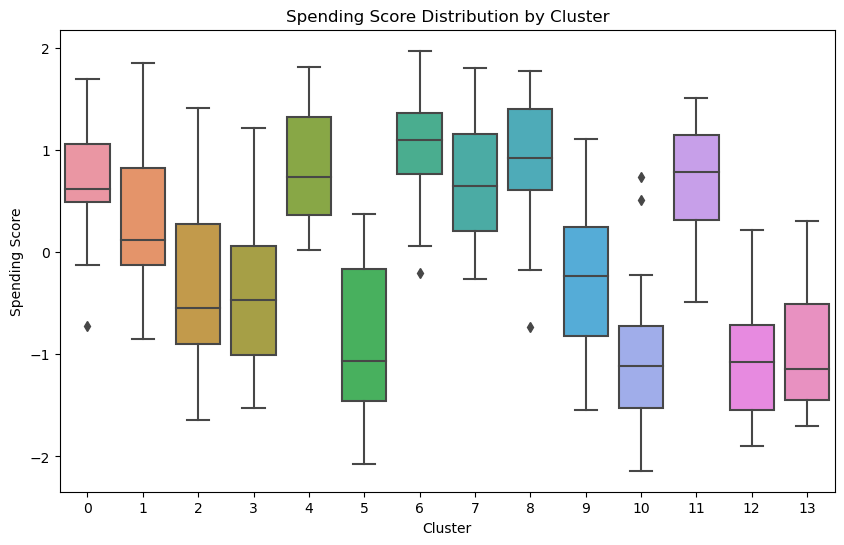

In [31]:
import seaborn as sns 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending_Score', data=df)
plt.title('Spending Score Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.show()


### Boxplot of Annual Income by Cluster

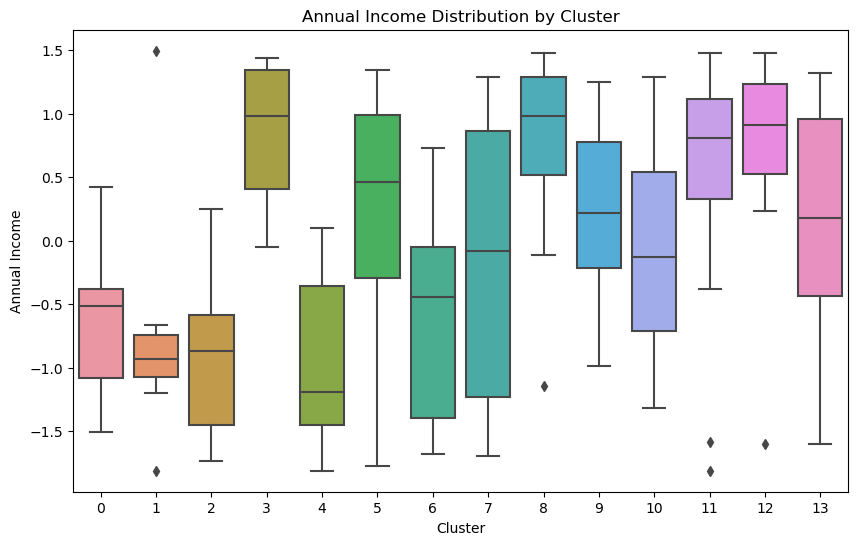

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual_Income', data=df)
plt.title('Annual Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income')
plt.show()

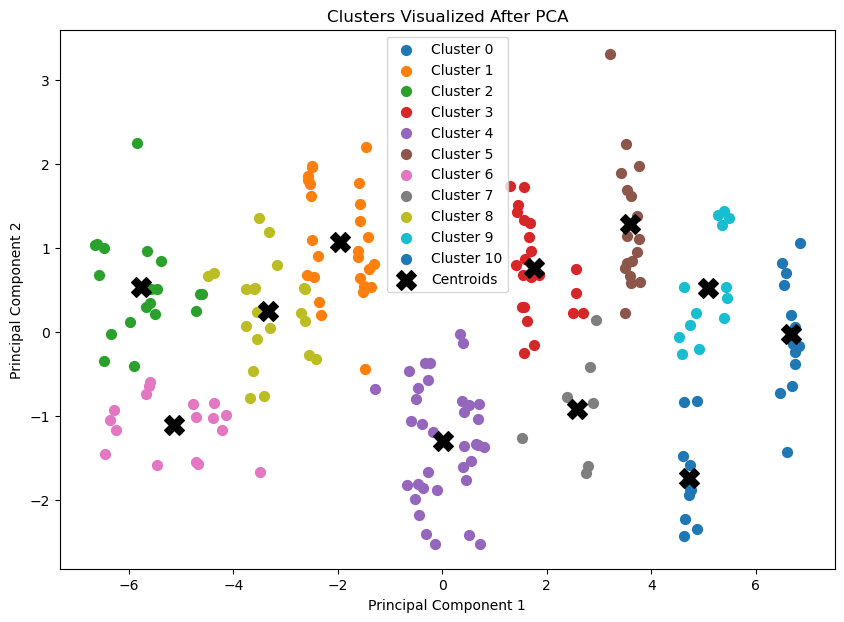

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Perform PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
ds_reduced = pca.fit_transform(df)

# Apply K-means clustering
n_clusters = 11  # Set the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(ds_reduced)

# Plotting the clusters and their centroids
plt.figure(figsize=(10, 7))
colors = plt.cm.get_cmap('tab10', n_clusters)

for i in range(n_clusters):
    cluster_points = ds_reduced[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                label=f'Cluster {i}', s=50, cmap=colors(i))

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='X', s=200, color='black', label='Centroids')

# Add plot title and labels
plt.title('Clusters Visualized After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()